# The Data Spartan

## Applying Convolutional Neural Networks using Keras on the Dogs Vs. Cats (Images) Dataset

## Imports

In [3]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
%matplotlib inline

Using TensorFlow backend.


## Paths

In [4]:
train = 'G:/Dogs vs. Cats/input/train/'
test = 'G:/Dogs vs. Cats/input/test1/'

## Global Variables

In [25]:
data = []
test_data = []
test_id = []
label = []
im_width = 64
im_height = 64
train_image_files = [ f for f in os.listdir(train) if os.path.isfile(os.path.join(train,f)) ]
test_image_files = [ f for f in os.listdir(test) if os.path.isfile(os.path.join(test,f)) ]

## Data Visualization

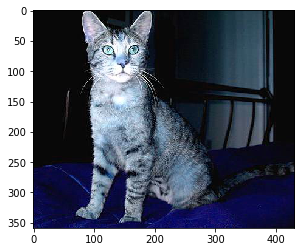

In [6]:
image_file = str(train + train_image_files[5])
img = cv2.imread(image_file)
plt.imshow(img)

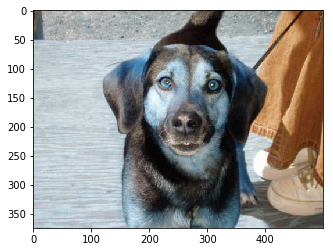

In [7]:
image_file = str(train + train_image_files[17000])
img = cv2.imread(image_file)
plt.imshow(img)

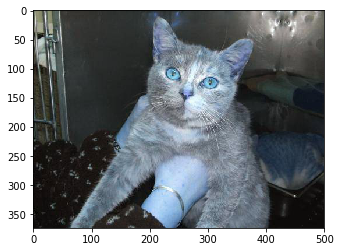

In [8]:
image_file = str(train + train_image_files[8000])
img = cv2.imread(image_file)
plt.imshow(img)

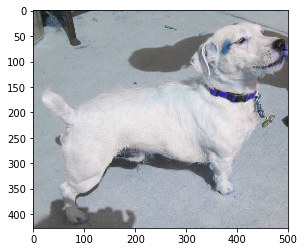

In [9]:
image_file = str(train + train_image_files[22000])
img = cv2.imread(image_file)
plt.imshow(img)

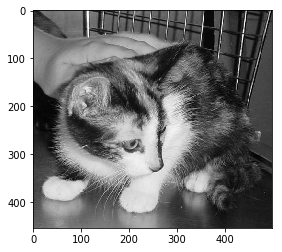

In [12]:
# Grayscale for easy processing
image_file = str(train + train_image_files[24])
img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE) # read a grayscale image
plt.imshow(img, cmap='gray') # show a grayscale image

## Preprocessing

In [13]:
def preprocessing(path):
    progress = 0
    image_files = [ f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]
    
    for file in image_files:
        image_file = str(path + file)
        
        img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (im_width, im_height))
        
        if file[:3] == 'cat':
            label.append(0)
            data.append(new_img / 255)
            
        elif file[:3] == 'dog':
            label.append(1)
            data.append(new_img / 255)
        
        progress = progress + 1
        if progress % 1000 == 0:
            print('Progress: ' + str(progress) + ' Images Done')
        
    print(len(data))
    print(len(label))    

In [15]:
preprocessing(train)

Progress: 1000 Images Done
Progress: 2000 Images Done
Progress: 3000 Images Done
Progress: 4000 Images Done
Progress: 5000 Images Done
Progress: 6000 Images Done
Progress: 7000 Images Done
Progress: 8000 Images Done
Progress: 9000 Images Done
Progress: 10000 Images Done
Progress: 11000 Images Done
Progress: 12000 Images Done
Progress: 13000 Images Done
Progress: 14000 Images Done
Progress: 15000 Images Done
Progress: 16000 Images Done
Progress: 17000 Images Done
Progress: 18000 Images Done
Progress: 19000 Images Done
Progress: 20000 Images Done
Progress: 21000 Images Done
Progress: 22000 Images Done
Progress: 23000 Images Done
Progress: 24000 Images Done
Progress: 25000 Images Done
25000
25000


## Building the CNN using Keras

In [17]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(im_width, im_height, 1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 3)         273       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 31, 31, 5)         380       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 10)          210       
__________

In [18]:
model.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

In [19]:
data = np.array(data)
print(data.shape)

(25000, 64, 64)


In [20]:
# Converting it into a Tensor
data = data.reshape((data.shape)[0], (data.shape)[1], (data.shape)[2], 1)
print(data.shape)

(25000, 64, 64, 1)


In [21]:
label = np.array(label)
print(label.shape)

(25000,)


In [22]:
model.fit(data, label, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 930s 53ms/step - loss: 0.5971 - acc: 0.7137 - val_loss: 1.2350 - val_acc: 4.0000e-04
Epoch 2/10
17500/17500 [==============================] - 944s 54ms/step - loss: 0.5908 - acc: 0.7107 - val_loss: 1.5683 - val_acc: 0.0012
Epoch 3/10
17500/17500 [==============================] - 895s 51ms/step - loss: 0.5784 - acc: 0.7137 - val_loss: 1.4944 - val_acc: 0.0332
Epoch 4/10
17500/17500 [==============================] - 918s 52ms/step - loss: 0.5633 - acc: 0.7195 - val_loss: 1.2522 - val_acc: 0.1131
Epoch 5/10
17500/17500 [==============================] - 914s 52ms/step - loss: 0.5538 - acc: 0.7215 - val_loss: 1.1055 - val_acc: 0.1744
Epoch 6/10
17500/17500 [==============================] - 906s 52ms/step - loss: 0.5481 - acc: 0.7266 - val_loss: 0.9084 - val_acc: 0.2984
Epoch 7/10
17500/17500 [==============================] - 908s 52ms/step - loss: 0.5554 - acc: 0.7229 - val_loss:

In [23]:
model.save("G:/Dogs vs. Cats/keras_model_attempt_1.h5")

In [24]:
#model = load_model("G:/Dogs vs. Cats/keras_model_attempt_1.h5")

In [27]:
def preprocessing_test(path):
    progress = 0
    
    for file in test_image_files:
        image_file = str(path + file)
        
        img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (im_width, im_height))
        
        test_id.append(file[:-4])
        test_data.append(new_img / 255)
        
        progress = progress + 1
        if progress % 1000 == 0:
            print('Progress: ' + str(progress) + ' Images Done')
        
    print(len(test_data))
    print(len(test_id))    

In [28]:
preprocessing_test(test)

Progress: 1000 Images Done
Progress: 2000 Images Done
Progress: 3000 Images Done
Progress: 4000 Images Done
Progress: 5000 Images Done
Progress: 6000 Images Done
Progress: 7000 Images Done
Progress: 8000 Images Done
Progress: 9000 Images Done
Progress: 10000 Images Done
Progress: 11000 Images Done
Progress: 12000 Images Done
12500
12500


In [29]:
test_data = np.array(test_data)
print(test_data.shape)

(12500, 64, 64)


In [31]:
test_data = test_data.reshape((test_data.shape)[0], (test_data.shape)[1], (test_data.shape)[2], 1)
print(test_data.shape)

(12500, 64, 64, 1)


In [32]:
predicted_labels = model.predict(test_data)

In [33]:
final_labels = []
for value in predicted_labels:
    if value > 0.5:
        final_labels.append(1)
    else:
        final_labels.append(0)

In [35]:
final_submission = pd.DataFrame({"id" : test_id })

In [36]:
final_submission["label"] = final_labels

In [37]:
final_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
id       12500 non-null object
label    12500 non-null int64
dtypes: int64(1), object(1)
memory usage: 195.4+ KB


In [38]:
final_submission.head()

,id,label
0,1,0
1,10,0
2,100,0
3,1000,0
4,10000,0


In [39]:
final_submission.to_csv("G:/Dogs vs. Cats/first_attempt_cnn_keras.csv", index=False)